<a href="https://colab.research.google.com/github/pavithrag21/cnn_deeplearning/blob/main/kerasdemo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten #used to build layers
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam # compile the model
from tensorflow.keras.utils import to_categorical #used to covert a integers into one hot categorical value
import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [ ]:
# from keras.datasets import cifar10

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [ ]:
print(f"x_train shape:{x_train.shape}")
print(f"y_train shape:{y_train.shape}")
print(f"x_test shape:{x_test.shape}")
print(f"y_test shape:{y_test.shape}")


x_train shape:(50000, 32, 32, 3)
y_train shape:(50000, 1)
x_test shape:(10000, 32, 32, 3)
y_test shape:(10000, 1)


In [ ]:
NUM_CLASSES = 10
classes = [
'airplane',
'automobile',
'bird',
'cat',
'deer',
'dog',
'frog',
'horse',
'ship',
'truck'
]

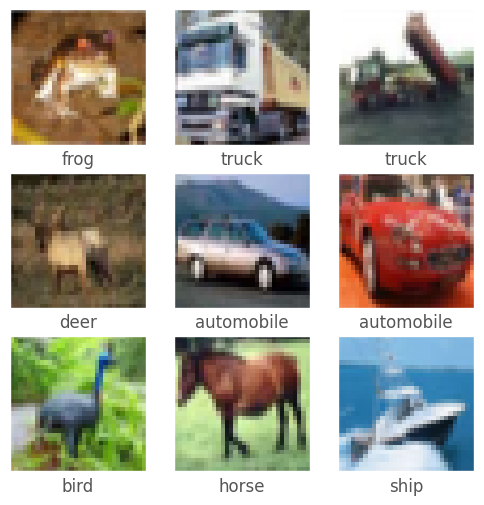

In [ ]:
# import matplotlib.pyplot as plt

# plt.style.use('dark_background')
plt.figure(figsize=(6, 6))
for i in range (9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i])
    plt.xlabel(classes[y_train[i].item()])
    plt.xticks([])
    plt.yticks([])
    plt.grid (False)
plt.show();

In [ ]:
## normalize the images
x_train = x_train.astype('float32') / 255
x_test= x_test.astype('float32') / 255
## check the images
x_train[0].dtype, x_train[0].max(), x_train [0].min()
#change into categorical values
y_train=to_categorical(y_train,NUM_CLASSES)
y_test=to_categorical(y_test,NUM_CLASSES)


In [ ]:
y_train[0:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
from tensorflow.keras.layers import Convolution2D


In [ ]:
#build a model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Conv2D(
    filters=32,#number of magnifiers and identify patterns
    kernel_size=(3,3),#magnifying each image
    strides=(1, 1),#number of steps to move
    padding="same",#fully observe including corners where it depends on strides
    activation="relu",#if eyes is visible then one if it is hidden 0
    input_shape=(32,32,3)

))

In [ ]:

#adding maxpool
from keras.layers import MaxPooling2D
model.add(
    MaxPool2D(pool_size=(2,2),
    padding="same",)
)

In [ ]:
# adding second layer
model.add(Conv2D(32,(3,3),activation="relu",padding="same"))
#another maxpool
model.add(MaxPooling2D(pool_size=(2, 2)))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
Total params: 10144 (39.62 KB)
Trainable params: 10144 (39.62 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.add(Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(MaxPool2D(2, 2))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 64)          0

In [ ]:
model.add(Flatten())
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 64)          0

flatten is a CNN is organizing the simplified information from the previous layers into single line.

In [ ]:
model.add(Dense(256,activation="relu"))
model.add(Dense(NUM_CLASSES))
model.add(Dense(NUM_CLASSES,activation="softmax"))


 dense will assure whether the predicted layer is true or false
 predicting its neighbour hood


In [ ]:
#compile
optimizer=Adam(learning_rate=0.01)
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
NUM_EPOCHS = 20
BATCH_SIZE = 128


In [ ]:
history = model.fit(
    x_train,
    y_train,
    epochs=NUM_EPOCHS,
    batch_size=BATCH_SIZE,
    shuffle=True,
    validation_data=(x_test, y_test)
)

Epoch 1/20
391/391 [==============================] - 9s 10ms/step - loss: 1.8565 - accuracy: 0.3165 - val_loss: 1.5821 - val_accuracy: 0.4145
Epoch 2/20
391/391 [==============================] - 3s 7ms/step - loss: 1.5803 - accuracy: 0.4246 - val_loss: 1.5141 - val_accuracy: 0.4519
Epoch 3/20
391/391 [==============================] - 3s 6ms/step - loss: 1.5153 - accuracy: 0.4504 - val_loss: 1.4892 - val_accuracy: 0.4605
Epoch 4/20
391/391 [==============================] - 3s 8ms/step - loss: 1.4663 - accuracy: 0.4704 - val_loss: 1.5324 - val_accuracy: 0.4426
Epoch 5/20
391/391 [==============================] - 3s 7ms/step - loss: 1.4461 - accuracy: 0.4753 - val_loss: 1.4414 - val_accuracy: 0.4831
Epoch 6/20
391/391 [==============================] - 2s 6ms/step - loss: 1.4198 - accuracy: 0.4867 - val_loss: 1.4181 - val_accuracy: 0.4827
Epoch 7/20
391/391 [==============================] - 2s 6ms/step - loss: 1.4050 - accuracy: 0.4912 - val_loss: 1.4527 - val_accuracy: 0.4734
Epoch

In [ ]:
## function to plot loss and accuracy
def plot_history (history):
  fig = plt.figure(figsize=(10, 4))
  ## accuracy plot
  plt.subplot (1, 2, 1)
  plt.plot (history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title(' Accuracy of Model')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend(['train', 'test'], loc='lower right' )
## loss plot
  plt.subplot (1, 2, 2)
  plt.plot (history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Loss of Model')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  # plt.legend (['train', 'test'], loc='upper right')
  plt.legend(['train', 'test'], loc='lower right')
  plt.tight_layout()

  fig.show();

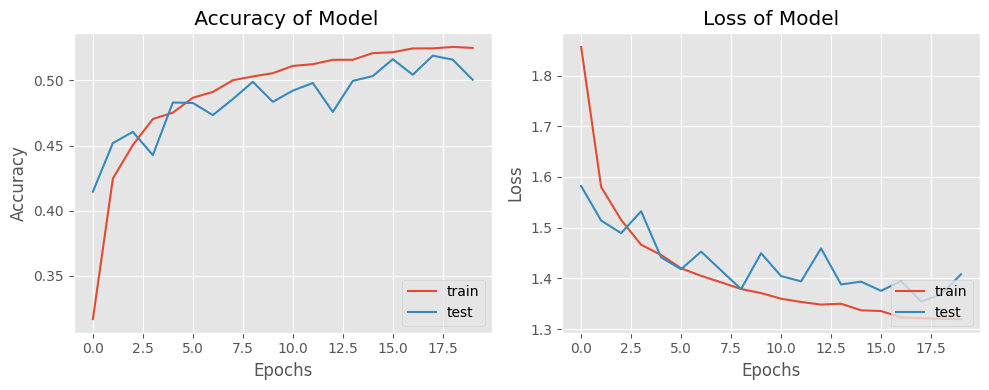

In [ ]:
plot_history (history)#function call

the graph contains overfitting hence to avoid it we use various techniques like dropout etc..


In [ ]:
model2=Sequential()

In [ ]:

## first layers
model2.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model2.add(MaxPool2D((2, 2)))
## Second layers
model2.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model2.add(MaxPool2D((2, 2)))
##add dropout also
model2.add(Dropout(0.3)) ## 30% dropout rate
## third layers
model2.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model2.add(MaxPool2D((2, 2)))
model2.add(Dropout(0.3)) ## 30% dropout rate


In [ ]:
model2.add(Flatten())

##dense layer one
model2.add(Dense(256,activation="relu"))
model2.add(Dropout(0.3))

##output
model2.add(Dense(NUM_CLASSES,activation="softmax"))#classification


In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 8, 8, 64)          0         
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 64)         

In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler
## learning rate schedule callback
def simple_decay (epoch, lr):
  if epoch < 30:
    lrate = lr
  elif epoch < 60:
    lrate = .0005
  else:
    lrate=0.0001
  return lrate

# create scheduler
scheduler = LearningRateScheduler(simple_decay)
callbacks = [scheduler]
optimizer = Adam(learning_rate=0.001)

In [ ]:
model2.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']

)

In [ ]:
history2 = model2.fit(
x_train,
y_train,
epochs=80,
shuffle=True,
validation_data=(x_test, y_test),
callbacks=callbacks,
)


Epoch 1/80
1563/1563 [==============================] - 10s 6ms/step - loss: 1.1967 - accuracy: 0.5735 - val_loss: 1.0253 - val_accuracy: 0.6422 - lr: 0.0010
Epoch 2/80
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0566 - accuracy: 0.6265 - val_loss: 0.9306 - val_accuracy: 0.6735 - lr: 0.0010
Epoch 3/80
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9743 - accuracy: 0.6562 - val_loss: 0.8754 - val_accuracy: 0.6995 - lr: 0.0010
Epoch 4/80
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9207 - accuracy: 0.6780 - val_loss: 0.8289 - val_accuracy: 0.7142 - lr: 0.0010
Epoch 5/80
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8728 - accuracy: 0.6927 - val_loss: 0.7694 - val_accuracy: 0.7362 - lr: 0.0010
Epoch 6/80
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8352 - accuracy: 0.7065 - val_loss: 0.7680 - val_accuracy: 0.7349 - lr: 0.0010
Epoch 7/80
1563/1563 [==============================] - 8

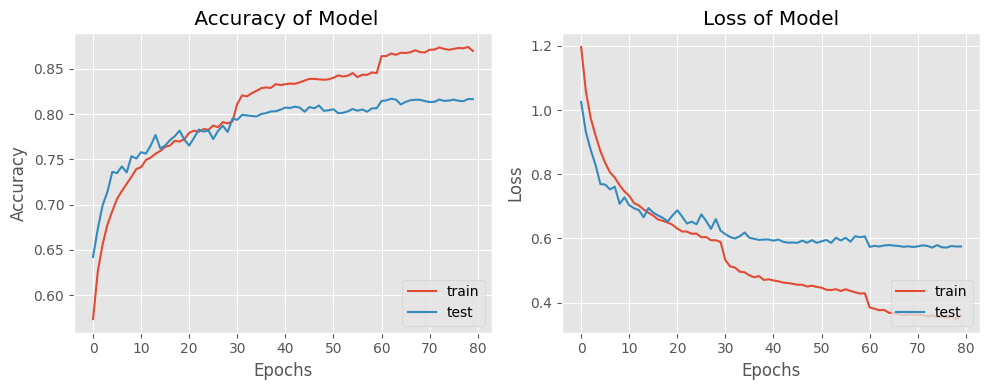

In [ ]:
plot_history(history2)